In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df.drop(columns = ['Serial No.'], inplace = True)

In [5]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [10]:
import tensorflow

In [11]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

In [42]:
model = Sequential()

model.add(Input(shape=(7,)))
model.add(Dense(14, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear')) # output ka node jo hota hai uska activation function 'Linear' hi rahega incase of regression

In [43]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [46]:
model.compile(loss = 'mean_squared_error', optimizer = 'Adam')

In [47]:
history = model.fit(X_train_scaled, y_train, epochs = 500, validation_split = 0.2, callbacks = callback)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.1176 - val_loss: 0.9510
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6991 - val_loss: 0.6746
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5518 - val_loss: 0.5376
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4398 - val_loss: 0.4456
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3819 - val_loss: 0.3720
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3224 - val_loss: 0.3086
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2691 - val_loss: 0.2484
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2085 - val_loss: 0.1899
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1632 - val_loss: 0.1344
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1088 - val_loss: 0.0879
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0708 - val_loss: 0.0527
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

In [48]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [49]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8016089665040423

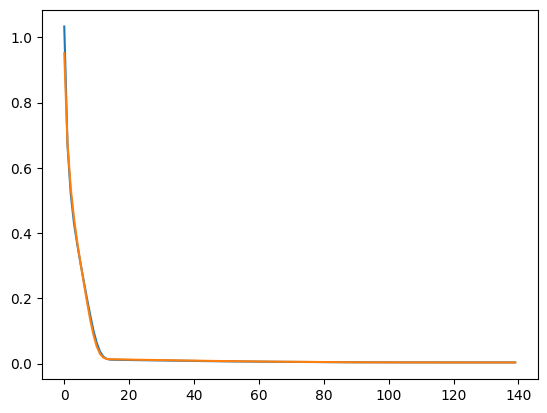

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])